## <font color=blue> Stats507-001 , WI 2019</font>
### Zizhao Zhang
#### zizhaoz@umich.edu
***

Time spent on problems(hours):   *Problem 1*: 1.5 , *Problem 2*: 1.5  *Problem 3*: 2.5
*Problem 4*: 2.0
***

Persons discussed idea about: None

### Problem 1: Regular Expressions: Warmup (4 points)
In this problem, you’ll get practice with basic regular expressions. Pay particular attention
to edge cases such as the empty string and single-character strings when writing your
regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt
is a list of about 100,000 English words.

In [1]:
import urllib.request
import re
from collections import Counter
import math
from itertools import groupby
import itertools
import matplotlib as mp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import random
import os
import sqlite3

#### 1.1: 
Use urllib to open the URL and read the file, and produce a list of ASCII strings
so that each line of the file corresponds to an element of the list. You will likely
need to convert the raw bytes read from the webpage to ASCII characters, for which
you should see the documentation for the string methods **encode** and **decode**. How
many words are in the file?

In [2]:
words_txt = urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
#note i did not strip the newlines
ascii_list = [line.decode("ascii",errors = "ignore").strip() for line in words_txt]  
ascii_list

['aa',
 'aah',
 'aahed',
 'aahing',
 'aahs',
 'aal',
 'aalii',
 'aaliis',
 'aals',
 'aardvark',
 'aardvarks',
 'aardwolf',
 'aardwolves',
 'aas',
 'aasvogel',
 'aasvogels',
 'aba',
 'abaca',
 'abacas',
 'abaci',
 'aback',
 'abacus',
 'abacuses',
 'abaft',
 'abaka',
 'abakas',
 'abalone',
 'abalones',
 'abamp',
 'abampere',
 'abamperes',
 'abamps',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasement',
 'abasements',
 'abaser',
 'abasers',
 'abases',
 'abash',
 'abashed',
 'abashes',
 'abashing',
 'abasing',
 'abatable',
 'abate',
 'abated',
 'abatement',
 'abatements',
 'abater',
 'abaters',
 'abates',
 'abating',
 'abatis',
 'abatises',
 'abator',
 'abators',
 'abattis',
 'abattises',
 'abattoir',
 'abattoirs',
 'abaxial',
 'abaxile',
 'abbacies',
 'abbacy',
 'abbatial',
 'abbe',
 'abbes',
 'abbess',
 'abbesses',
 'abbey',
 'abbeys',
 'abbot',
 'abbotcies',
 'abbotcy',
 'abbots',
 'abbreviate',
 '

In [3]:
print("There are " + str(len(ascii_list))+ " words in the file. ")

There are 113809 words in the file. 


#### 1.2 response:

Exploring the raw data is a good habit when the data is not familiar and variates a lot, the data within the initial url retrived text are bytes, with b' tag in front of the every single line of the text, unlike the UTF-8 representation of direct text from the original text file online. In that I would have a better sense of what to do with whether "encoding" or "decoding" is the next step in terms of data preprocessing. After the ASCII decoding of the text list, the "\b" tags disappear, however, the carriage return "\r" and line feed "\n" still presist, it we want to strip them we can add ".strip()" at the end


#### 1.3：
Write a regular expression that matches any string containing exactly four consecutive consonants. Compile this regular expression, and assign it to a variable called
**four_consecutive_consonants**. Use this regex to determine how many words from
the list with exactly four consecutive consonants. For the purposes of this specific problem, the vowels are a, e, i, o, u, y. All other letters are consonants.
Produce a list of all such words

In [4]:
reg_list = [line.strip().lower() for line in ascii_list]

#pattern for four_consecutive_consonants.
four_consecutive_consonants = re.compile(r'([aeiouy][^aeiouy]{4}$|^[^aeiouy]{4}[aeiouy]|[aeiouy][^aeiouy]{4}[aeiouy]|^[^aeiouy]{4}$)',flags=re.IGNORECASE)       
f_consonants = [i for i in reg_list if four_consecutive_consonants.search(i) \
                      is not None]
f_consonants

['absinths',
 'abstract',
 'abstracted',
 'abstracter',
 'abstractest',
 'abstracting',
 'abstraction',
 'abstractions',
 'abstractly',
 'abstractness',
 'abstractnesses',
 'abstracts',
 'abstrict',
 'abstricted',
 'abstricting',
 'abstricts',
 'abstruse',
 'abstrusely',
 'abstruseness',
 'abstrusenesses',
 'abstruser',
 'abstrusest',
 'adjuncts',
 'adminstration',
 'adminstrations',
 'adscript',
 'adscripts',
 'affrights',
 'afterthoughts',
 'airbursts',
 'airscrew',
 'airscrews',
 'airstrip',
 'airstrips',
 'airths',
 'algorithms',
 'alights',
 'allspice',
 'allspices',
 'almsman',
 'almsmen',
 'amaranths',
 'amongst',
 'anarchs',
 'anarthria',
 'angst',
 'ankhs',
 'anthraces',
 'anthracite',
 'anthracites',
 'anthrax',
 'anthropoid',
 'anthropological',
 'anthropologist',
 'anthropologists',
 'anthropology',
 'aphtha',
 'aphthae',
 'aphthous',
 'archbishop',
 'archbishopric',
 'archbishoprics',
 'archbishops',
 'archdiocese',
 'archdioceses',
 'archduke',
 'archdukes',
 'archly',
 '

In [5]:
print("There are " + str(len(f_consonants))+ " words with four consecutive consonants. ")

There are 1567 words with four consecutive consonants. 


#### 1.4:
Write a regular expression that matches any string that contains no instances of the
letter e. Compile this regular expression, and assign it to a variable called gadsby.
(Gadsby is the title of an English novel written in the 1930s that contains almost no
instances of the letter e). How many words in the list do not contain the letter e?

In [6]:
gadsby = re.compile(r'^[^e]+$',flags=re.IGNORECASE)
gadsby_list = [i for i in reg_list if gadsby.search(i) is not None]

In [7]:
print("There are " + str(len(gadsby_list))+ " words does not contain letter e. " )

There are 37641 words does not contain letter e. 


#### 1.5:
Write a regular expression that matches any string that begins and ends with a
vowel and has no vowels in between. For the purposes of this **specific** problem, y is
neither consonant nor vowel, so consonants are the 20 letters that are not one of a,
e, i, o, u, y and vowels are a, e, i, o, u. The words need not begin and end
with the same vowel, so **angle** is a valid match. Compile this regular expression,
and assign it to a variable called **vowel_vowel**. How many words begin and end
with a vowel with no vowels in between?

In [8]:
vowel_vowel = re.compile(r'^[aeiou][^aeiou]*[aeiou]$|^[aeiou]$',flags=re.IGNORECASE)
vowel_vowel_list = [i for i in reg_list if vowel_vowel.search(i) is not None]
len(vowel_vowel_list)#aa in consideration

192

In [9]:
print("There are " + str(len(vowel_vowel_list))+ " words begin and end with a vowel with no vowels in between " )

There are 192 words begin and end with a vowel with no vowels in between 


#### 1.6:
Write a regular expression that matches any string whose last two characters are
the first two characters in reverse order. So, for example, your regex should match
**repeater** and **stats**, but not **neoprene**. Compile this regular expression and assign
it to a variable called **bookends**. How many words in the list have this property?
**Hint**: be careful of the cases in which the word is length less or equal to 3. You
may handle the case of a single character (e.g., a), as you like, but please give an
explanation for your choice.

In [10]:
bookends = re.compile(r'^(\w)(\w).*\2\1$|^(\w).\3$|^(\w)\4$',flags=re.IGNORECASE)
bookends_list = [i for i in reg_list if (bookends.search(i) is not None)]# or \

In [11]:
len(bookends_list)
print("There are " + str(len(bookends_list))+ " words whose last two characters are the first two characters in reverse order" )

There are 886 words whose last two characters are the first two characters in reverse order


### Problem 2: Exploring Internet Traffic with Regexes (4 points)
In this problem, you’ll get a taste of a more realistic application of regular expressions. The
file http://umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt contains data generated by web traffic associated with Skype and IRC, captured using the
Wireshark program, a common tool for analyzing web traffic. The original data file can
be found on the Wireshark wiki, https://wiki.wireshark.org/SampleCaptures, but
please use the file provided on my website for this assignment.

#### 2.1: 
Download the file from the URL above (or use urllib or requests to open it
directly, being careful to convert the raw bytes back to UTF-8) and read its contents
into a string. Each line of this file corresponds to a single packet sent over the
internet. How many packets are in this file? Save the answer in a variable **n_packets**.
Note: if you decide to download the file, don’t forget to include a copy of it in your
submission so that we can run your code.

In [12]:
SkypeIRC = urllib.request.urlopen('http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/SkypeIRC.txt')
packets = [i.decode('utf-8').strip() for i in SkypeIRC]
n_packets = len(packets)
n_packets 

2263

In [13]:
packets

['1   0.000000  192.168.1.2 → 212.204.214.114 IRC 96 Request (ISON)',
 '2   0.125852 212.204.214.114 → 192.168.1.2  TCP 66 6667 → 2848 [ACK] Seq=1 Ack=31 Win=57890 Len=0 TSval=2196036564 TSecr=14215752',
 '3   0.137361 212.204.214.114 → 192.168.1.2  IRC 112 Response (303)',
 '4   0.137413  192.168.1.2 → 212.204.214.114 TCP 66 2848 → 6667 [ACK] Seq=31 Ack=47 Win=8011 Len=0 TSval=14215889 TSecr=2196036565',
 '5   0.235960  192.168.1.2 → 192.168.1.1  DNS 84 Standard query 0x311f PTR 2.1.168.192.in-addr.arpa',
 '6   0.236116  192.168.1.2 → 192.168.1.1  DNS 88 Standard query 0x3120 PTR 114.214.204.212.in-addr.arpa',
 '7   0.270252  192.168.1.1 → 192.168.1.2  DNS 84 Standard query response 0x311f PTR 2.1.168.192.in-addr.arpa',
 '8   0.294105  192.168.1.1 → 192.168.1.2  DNS 123 Standard query response 0x3120 PTR 114.214.204.212.in-addr.arpa PTR sterling.freenode.net',
 '9   0.985963  192.168.1.2 → 192.168.1.1  DNS 81 Standard query 0x3121 A sterling.freenode.net',
 '10   0.988328  192.168.1.1

#### 2.2:
Use regular expressions to extract all the IP addresses from the file and collect them
in a Python list. An IP address consists of four numbers, which are displayed as
A.B.C.D where A,B,C and D are each numbers between 0 and 255. How many unique
IP addresses appear in the data set? Save the answer in a variable **ip_addresses**

In [14]:
#pattern for just matching the digits
#ip_pat = re.compile(r"\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")
#valid_ip addresses ipv4
ip_pat_255 = re.compile(r"(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)")
#####ensureing the digits to be between 0-255
ip = [k for j in [ip_pat_255.findall(i) for i in packets] for k in j]
ip_addresses = len(set(ip))

verify that all ip_addresses are valid

In [15]:
all([(int(j)<=255 and int(j)>=0) for i in [i.split(".") for i in set(ip)] for j in i])

True

In [16]:
print("There are " + str(ip_addresses)+ " unique valide ip addresses  " )

There are 368 unique valide ip addresses  


#### 2.3:
 Write a function called **get_packets_by_regex** that takes a single raw string as its
argument and returns all lines of the input file that match the input raw string as
a regular expression. So, for example, **get_packets_by_regex(r’comcast’)** will
return all lines from the file containing the string **’comcast’**.<font color = blue> Your function should
perform appropriate error checking to ensure that the input is a string, but you do
not need to check that it is a raw string.</font>

In [17]:
def get_packets_by_regex(rstr):
    ####error checking for input type
    if not isinstance(rstr, str):
        raise TypeError("please input a raw string")
    pattern = re.compile(rstr)
    return [i for i in packets if pattern.search(i) is not None]

In [18]:
len(get_packets_by_regex(r'comcast'))

74

#### 2.4:
The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting
the time (in seconds) since the beginning of the traffic recording. Using **matplotlib**,
create a plot displaying how many packets appeared in each second of the recording.
A histogram or line plot is the most obvious way to do this, but you should feel
free to use a more creative way of displaying this information if you wish to do so.
Note: in case it wasn’t obvious, there is no need to use a regular expression for this
subproblem if you do not want to.

below is a traditional histogram plot, with the number of bins as the range of time stamp

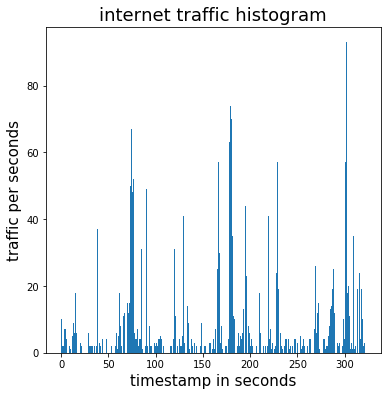

In [19]:
#==================# just go with traditional histogram:
plt.figure(figsize=(6,6))
####bins number = the max seconds in the timestamp
plt.hist([(float((x[:9][-5:])))for x in packets],bins = max([math.floor(float((x[:9][-5:])))for x in packets]))
plt.xlabel("timestamp in seconds",fontsize = 15)
plt.ylabel("traffic per seconds",fontsize = 15)
plt.title('internet traffic histogram',fontsize = 18)
_ = plt.show()

***
Calculated the frequency of traffic per second, and map the result to according second.
For creating 2-d histogram along with a line-plot

In [20]:
###approximately > O(N) solution where m is the count per second
def get_traffic(txt_l):
    '''
        get the traffic frequency map per second 
        @res: same length as n_packets
    '''
    res = []
    count = 1 
    for i in range(0,len(txt_l)-1):
        if math.floor(float((txt_l[i][:9][-5:]))) == \
            math.floor(float((txt_l[i+1][:9][-5:]))):
            count += 1
        else: 
            for i in range(count):
                res.append(count)
            count = 1
    for i in range(count):
                res.append(count)
    return res

plot the 2d histogram of internet traffic and the line plot/(scatter plot along) of traffic map with exact traffic per second. Three ways of plottings are all accurate with no distortion of the scale of the frequency as the tradtional histogram does.

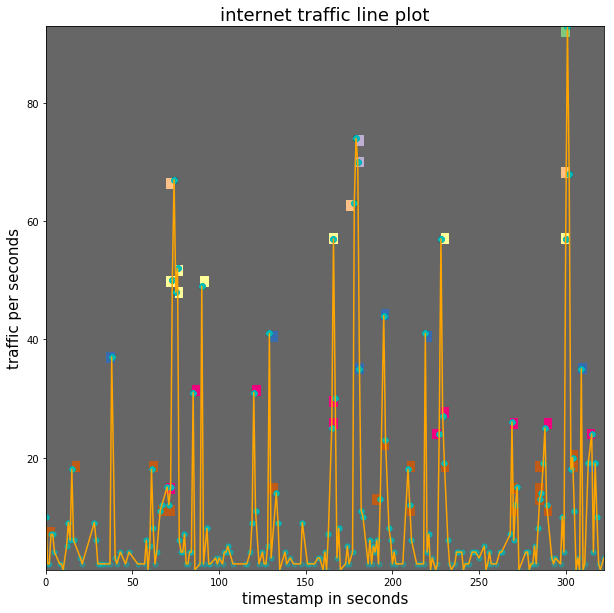

In [21]:
###simple histogram
plt.figure(figsize=(10,10))
traffic_map = get_traffic(packets)
plt.hist2d([math.floor(float((x[:9][-5:])))for x in packets],
           traffic_map,bins =(65,50),cmap=plt.cm.Accent_r)
plt.scatter([math.floor(float((x[:9][-5:])))for x in packets],
            traffic_map, s = 25, alpha = 0.2,marker = "o",color = "c")
plt.plot([math.floor(float((x[:9][-5:])))for x in packets],traffic_map,color = "orange")
plt.xlabel("timestamp in seconds",fontsize = 15)
plt.ylabel("traffic per seconds",fontsize = 15)
plt.title('internet traffic line plot',fontsize = 18)
_ = plt.show()

### Problem 3: Retrieving Data from the Web (6 points)
In this problem, we’ll scrape data from Wikipedia using **BeautifulSoup**. Documentation
for **BeauitfulSoup** can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called **requests**, which
is becoming quite popular, which you are welcome to use for this problem instead, if
you wish. Documentation for the **requests** package can be found at 
http://docs.python-requests.org/en/master/.
Suppose you are trying to choose a city to vacation in. A major factor in your decision
is weather. Conveniently, lots of weather information is present in the Wikipedia articles
for most world cities. Your job in this problem is to use **BeautifulSoup** to retrieve weather
information from Wikipedia articles. We should note that in practice, such information is
typically more easily obtained from, for example, the National Oceanic and Atmospheric
Administration (NOAA), in the case of American cities, and from analogous organizations
in other countries.
***

#### 3.1：

Look at a few Wikipedia pages corresponding to cities. For example:

• https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan

• https://en.wikipedia.org/wiki/Buenos_Aires

• https://en.wikipedia.org/wiki/Harbin

Note that most city pages include a table titled something like “Climate data for
[Cityname] **(normals YYYY-YYYY, extremes YYYY-YYYY)** ” Find a Wikipedia
page for a city that includes such a table (such as one of the three above). In
your jupyter notebook, open the URL and read the HTML using either **urllib** or
**requests**, and parse it with BeautifulSoup using the standard parser, **html.parser**.
Have a look at the parsed HTML and find the climate data table, which will have
the tag table and will contain a child tag **th** containing a string similar to

**Climate data for [Cityname] (normals YYYY-YYYY, extremes YYYY-YYYY).**

Find the node in the **BeautifulSoup** object corresponding to this table. What is the
structure of this node of the tree (e.g., how many children does the table have, what
are their tags, etc.)? You may want to learn a bit about the structure of HTML
tables by looking at the resources available on these websites:

• https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table

• https://www.w3schools.com/html/html_tables.asp

• https://www.w3.org/TR/html401/struct/tables.html

Look at the Climate data table for Ann Arbor

In [22]:
ann_arbor = urllib.request.urlopen('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan')
arbor_parsed = BeautifulSoup(ann_arbor, "html.parser")
tbl_text = re.compile(r"\n\nClimate data for")
ann_tbl = []
for i in arbor_parsed.find_all("table"):
    if tbl_text.match(i.get_text()):
        ann_tbl.append(i)
ann_tbl = ann_tbl[0]
ann_tbl.contents
ann_tbl = BeautifulSoup(str(ann_tbl), "html.parser")
#ann_tbl = arbor_parsed.find("table", class_ = "wikitable collapsible")
print("Table node of Ann-arbor climate table has "+ str(len(ann_tbl.contents)) +\
                 " children")

Table node of Ann-arbor climate table has 1 children


#### 3.1 explanation:

The table node is retrivable by find the the text/title of the table nodes, the children of climate table node can either be acessed by calling "tbl_node.contents" or by calling "tbl_node.children". After I used list comprehension to look through the children under the node tag element tag, the children list has length 2 but the first element in the list is "\n" a seperator, in that the number of legitammite children is <font color = blue> 1 </font> the tag of such is $$<tbody>$$, and parsing it again renders the correct result.

#### 3.2:
Write a function **retrieve_climate_table** that takes as its only argument a WikipediaURL, and returns the BeautifulSoup object corresponding to the climate data table(if it exists in the page) and returns None if no such table exists on the page.  

In [23]:
import random
def retrieve_climate_table(url):
    ##table title should start with Climate data
    try:
        tbl_text = re.compile(r"\n\nClimate data for")
        ##check input type
        if not isinstance(url, str) :
            raise TypeError("Please input URL link as string type")
        if not urllib.request.urlopen(url) :
            raise ValueError("URL is not valid")
        ##parsing in the climate table   
        Climate_tbl = []
        wiki = urllib.request.urlopen(url)
        wiki_parsed = BeautifulSoup(wiki, "html.parser")
        for i in wiki_parsed.find_all("table"):
            if tbl_text.match(i.get_text()):
                Climate_tbl.append(i)
        ##case for one table only
        if len(Climate_tbl) == 1:
            return BeautifulSoup(str(Climate_tbl[0]), "html.parser")
        ##case with multiple tables
        if len(Climate_tbl) > 1:
            return BeautifulSoup(str(Climate_tbl[random.randint(0,len(Climate_tbl)-1)]),
                                 "html.parser")
        else:
            return None
    except (urllib.error.HTTPError, ValueError) as acess_error:
        raise ValueError("URL is not accessible!!!!!!")

or we can search the "th" tags instead of above using get_text

In [24]:
retrieve_climate_table("https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan")

<table class="wikitable collapsible" style="width:100%; text-align:center; line-height: 1.2em; margin:auto;">
<tbody><tr>
<th colspan="14">Climate data for Ann Arbor, Michigan (UMich, 1981–2010)
</th></tr>
<tr>
<th scope="row">Month
</th>
<th scope="col">Jan
</th>
<th scope="col">Feb
</th>
<th scope="col">Mar
</th>
<th scope="col">Apr
</th>
<th scope="col">May
</th>
<th scope="col">Jun
</th>
<th scope="col">Jul
</th>
<th scope="col">Aug
</th>
<th scope="col">Sep
</th>
<th scope="col">Oct
</th>
<th scope="col">Nov
</th>
<th scope="col">Dec
</th>
<th scope="col" style="border-left-width:medium">Year
</th></tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)
</th>
<td style="background: #FF860D; color:#000000;">72<br/>(22)
</td>
<td style="background: #FF9B37; color:#000000;">67<br/>(19)
</td>
<td style="background: #FF5600; color:#000000;">85<br/>(29)
</td>
<td style="background: #FF4800; color:#000000;">88<br/>(31)
</td>
<td style="background: 

#### 3.3:
Write a function **list_climate_table_row_names** that takes as its only argumenta  Wikipedia  URL  and  returns  a  list  of  the  row  names  of  the  climate  data  table,or returnsNoneif no such table exists.

In [63]:
def list_climate_table_row_names(url):
    tbls = retrieve_climate_table(url)
    ###trs are rows, tds are columns
    ###extract row names with scope
    invalid_row_names = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep",
                         "Oct","Nov","Dec","Year"]
    #title text
    title_txt = re.compile(r"Climate data for")
    if tbls:
        row_names = []
        for row in tbls.find_all("tr"):
            index_tags = row.find_all('th',{"scope":"row"}) 
            if index_tags:
                for i in index_tags:
                    row_names.append(i.get_text().strip())
            # table do not have proper scope documented 
            else: 
                crude_tags = row.find_all('th') 
                if crude_tags:
                    for i in crude_tags:
                        if i.has_attr("colspan") == False:
                            crude_txt = i.get_text().strip()
                            #make sure the row_names don't have the header columns
                            # or the title
                            if crude_txt not in invalid_row_names and \
                                not title_txt.match(crude_txt) :
                                row_names.append(crude_txt)
        return row_names
    else:return None

In [64]:
list_climate_table_row_names("https://en.wikipedia.org/wiki/Buenos_Aires")

['Month',
 'Average sea temperature °C (°F)',
 'Mean daily daylight hours',
 'Average Ultraviolet index']

#### <font color = red>just for fun</font>: here's the function to take a url and output a pandas data frame:
Note I didn't used the **list_climate_table_row_names** to get the row names for pratice


In [27]:
def wiki_html_table_to_df(url):
    tbls = retrieve_climate_table(url)
    if not tbls: return None
    ###trs are rows, tds are columns
    ###lets plot the entries of the table
    data_frame = []
    column_names = []
    row_names = []
    for row in tbls.find_all("tr"):
        ###"th" tags are the header cell in the table
        col_tags = row.find_all('th',{"scope":"col"}) 
        index_tags = row.find_all('th',{"scope":"row"}) 
        if len(index_tags) >= 0:
            for i in index_tags:
                row_names.append(i.get_text().strip())
        if len(col_tags) >= 0:
            for i in col_tags:
                column_names.append(i.get_text().strip())
        cols = row.find_all('td')
        ele_row_wise = [ele.text.strip() for ele in \
                    cols if ele.text.strip() and ele.has_attr("colspan") == False]
        if ele_row_wise:
            data_frame.append(ele_row_wise)
    return pd.DataFrame(data_frame,columns=column_names,index = row_names[1:])

In [28]:
###try with another url for fun
wiki_html_table_to_df("https://en.wikipedia.org/wiki/Los_Angeles")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Record high °F (°C),91(33),92(33),95(35),95(35),91(33),103(39),93(34),98(37),106(41),101(38),101(38),94(34),106(41)
Mean maximum °F (°C),81.2(27.3),81.0(27.2),79.6(26.4),83.4(28.6),79.9(26.6),80.0(26.7),83.6(28.7),85.7(29.8),90.1(32.3),89.9(32.2),85.5(29.7),78.9(26.1),94.7(34.8)
Average high °F (°C),64.6(18.1),64.3(17.9),64.4(18.0),66.4(19.1),68.1(20.1),70.6(21.4),73.8(23.2),74.9(23.8),74.6(23.7),72.5(22.5),68.9(20.5),64.6(18.1),69.0(20.6)
Daily mean °F (°C),56.7(13.7),57.1(13.9),58.0(14.4),60.1(15.6),62.7(17.1),65.5(18.6),68.8(20.4),69.6(20.9),68.9(20.5),65.9(18.8),61.1(16.2),56.6(13.7),62.6(17.0)
Average low °F (°C),48.8(9.3),50.0(10.0),51.7(10.9),53.8(12.1),57.3(14.1),60.5(15.8),63.7(17.6),64.3(17.9),63.2(17.3),59.3(15.2),53.2(11.8),48.7(9.3),56.2(13.4)
Mean minimum °F (°C),41.1(5.1),42.5(5.8),44.6(7.0),47.5(8.6),52.5(11.4),56.2(13.4),59.8(15.4),60.6(15.9),58.4(14.7),52.7(11.5),45.3(7.4),40.9(4.9),38.8(3.8)
Record low °F (°C),27(−3),34(1),35(2),42(6),45(7),48(9),52(11),51(11),47(8),43(6),38(3),32(0),27(−3)
Average rainfall inches (mm),2.71(69),3.25(83),1.85(47),0.70(18),0.22(5.6),0.08(2.0),0.03(0.76),0.05(1.3),0.21(5.3),0.56(14),1.11(28),2.05(52),12.82(326)
Average rainy days (≥ 0.01 in),6.0,6.6,5.8,2.8,1.2,0.6,0.5,0.3,1.0,2.3,3.4,5.2,35.7
Average relative humidity (%),63.4,67.9,70.5,71.0,74.0,75.9,76.6,76.6,74.2,70.5,65.5,62.9,70.8


#### 3.4:
The next natural  step would  be to write a **function  that takes a URL and a rowname** and retrieves the data from that row of the climate data table (if the table exists and has that row name).  Doing this would require some complicated stringwrangling to get right, so I’ll spare you the trouble.  Instead, please briefly describ eeither in pseudo code or in plain English how you would accomplish this, using thetwo functions you wrote above and the tools available to you in theBeautifulSouppackage.Note:just to be clear, youdo nothave to write any code for this laststep.

### Approach and solution :
One approach: store the row names by calling **list_climate_table_row_names**, get the table node by calling **retrieve_climate_table** , get the index of input row names, traverse through the children of the table node, append all the "th" tag content with "scope" col into a list, in that mapped with index-1 along the list. Followingly, return the elements as desired

In [29]:
def row_elements(url, row_name):
    if not isinstance(row_name,str):
        raise TypeError("input row name as a string type")
    ##incase the input row_name had extra spaces
    row_name = row_name.strip()
    tbls = retrieve_climate_table(url)
    if not tbls: return None
    ###trs are rows, tds are columns
    ###lets plot the entries of the table
    data_frame = []
    column_names = []
    row_names = list_climate_table_row_names(url)
    for row in tbls.find_all("tr"):
        ###"th" tags are the header cell in the table
        col_tags = row.find_all('th',{"scope":"col"}) 
        if len(col_tags) >= 0:
            for i in col_tags:
                column_names.append(i.get_text().strip())
        cols = row.find_all('td')
        ele_row_wise = [ele.text.strip() for ele in \
                    cols if ele.text.strip() and ele.has_attr("colspan") == False]
        if ele_row_wise:
            data_frame.append(ele_row_wise)
    #check proper input 
    if row_name not in row_names:
        raise ValueError("given row names not in the table")
    index = row_names.index(row_name)
    return data_frame[index-1] if index >0 else column_names

In [30]:
row_elements("https://en.wikipedia.org/wiki/Lanzhou","Average high °C (°F)")

['1.7(35.1)',
 '6.0(42.8)',
 '12.2(54.0)',
 '19.6(67.3)',
 '24.1(75.4)',
 '27.3(81.1)',
 '29.3(84.7)',
 '27.9(82.2)',
 '22.8(73.0)',
 '16.7(62.1)',
 '9.5(49.1)',
 '2.8(37.0)',
 '16.7(62.0)']

Besides, we could also use the function we created above named **"row_elements_pd"**. In such way, the return data frame is esthetically better as shown below(with column names for reference)

In [31]:
def row_elements_pd(url, row_name):
    if not isinstance(row_name,str):
        raise TypeError("input row name as a string type")
    ##incase the input row_name had extra spaces
    row_name = row_name.strip()
    #get the pd data frame from the url
    tbl_df = wiki_html_table_to_df(url)
    #rows
    rows = ["Month"]+list(tbl_df.index)
    if row_name not in rows:
        raise ValueError("given row names not in the table")
    index = rows.index(row_name)
    if index == 0:
        return list(tbl_df.columns)
    if index > 0:
        return tbl_df.iloc[[index-1]]

In [32]:
row_elements_pd("https://en.wikipedia.org/wiki/Lanzhou","Average high °C (°F)")

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
Average high °C (°F),1.7(35.1),6.0(42.8),12.2(54.0),19.6(67.3),24.1(75.4),27.3(81.1),29.3(84.7),27.9(82.2),22.8(73.0),16.7(62.1),9.5(49.1),2.8(37.0),16.7(62.0)


### Problem 4:  Relational Databases and SQL (6 points)

#### 4.1: 
Load the database using the Python **sqlite3** package.  How many tables are in thedatabase?  Save the answer in the variable **n_tables**.

In [33]:
##make connections
conn = sqlite3.connect('./Chinook_Sqlite.sqlite')
##create cursor to allow sql commands
cursor = conn.cursor()

In [34]:
###commands in doc strings
n_tables = cursor.execute('''SELECT COUNT(*) FROM sqlite_master WHERE type='table';''')
n_tables = [i[0] for i in n_tables][0]
print(n_tables)

11


#### 4.2:
What  are  the  names  of  the  tables  in  the  database?   Save  the  answer  as  a  list  ofstrings, **table_names** .Note: you  should  write  Pythonsqlite3code  to  answerthis; don’t just look up the answer in the documentation

In [35]:
tbl_nm_cmd = cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';
                            """)
table_names = [i[0] for i in tbl_nm_cmd]
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


#### 4.3:
Write  a  function **list_album_ids_by_letter** that takes as an argument a singlecharacter and returns a list of the primary keys of all the albums whose titles startwith that character.  Your function should ignore case, so that the inputs “a” and“A” yield the same results.  Include <FONT COLOR = RED>error checking that raises an error in the event that the input is not a single character.</font>

In [36]:
def list_album_ids_by_letter(char):
    if not isinstance(char,str):
        raise TypeError("Please input a str")
    if len(char) != 1:
        raise ValueError("input str should be len 1")
    album_cmd = cursor.execute("""SELECT * FROM Album""")
    return [i[0] for i in album_cmd if i[1][0].lower() == char.lower()]

In [37]:
list_album_ids_by_letter("f")

[1, 7, 60, 88, 99, 163, 288, 322]

#### 4.4:
Write  a  function **list_song_ids_by_album_letter** that  takes  as  an  argument  asingle  character  and  returns  a  list  of  the  primary  keys  of  all  the  songs  whose  al-bum  names  begin  with  that  letter.  

In [38]:
def list_song_ids_by_album_letter(char):
    """since 3503 is both the length of table Album and Track,
       we're using inner join for this perticular problem"""
    if not isinstance(char,str):
        raise TypeError("Please input a str")
    if len(char) != 1:
        raise ValueError("input a single char")
    ##create a cursor where joining the two table on AlbumID 
    joined_tbl = cursor.execute("""SELECT * FROM Track INNER JOIN Album 
                                ON Track.AlbumId = Album.AlbumID""")
    ##return TrackID, which is on index 0 if ablum title, which is on index
    ## 10 is matched
    return [i[0] for i in joined_tbl if i[10][0].lower() == char.lower()]

In [39]:
list_song_ids_by_album_letter(".")

[1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901]

#### 4.5:
Write a function **total_cost_by_album_letter** that takes as an argument a single character and returns the cost of buying every song whose album begins with thatletter.  This cost should be based on the tracks’ unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set.  Again your function should ignore case and perform appropriate error checking.

In [40]:
def total_cost_by_album_letter(char):
    """suming the unit price grouping by the AlbumID, return the sum of the sum"""
    if not isinstance(char,str):
        raise TypeError("Please input a str")
    if len(char) != 1:
        raise ValueError("input a single char")
    price_tbl = cursor.execute("""SELECT SUM(UnitPrice),TrackId, Title FROM Track INNER JOIN 
                                Album ON Track.AlbumId = Album.AlbumID GROUP BY Track.AlbumId
                                """)
    return sum([i[0] for i in price_tbl if i[2][0].lower() == char.lower()])

In [41]:
total_cost_by_album_letter("c")

255.42000000000004